In [42]:
from itertools import product

import numpy as np
import sklearn

from sklearn.metrics import confusion_matrix
from sklearn.utils import check_matplotlib_support


class ConfusionMatrixDisplay:
    """Confusion Matrix visualization.
    It is recommend to use :func:`~sklearn.metrics.plot_confusion_matrix` to
    create a :class:`ConfusionMatrixDisplay`. All parameters are stored as
    attributes.
    Read more in the :ref:`User Guide <visualizations>`.
    Parameters
    ----------
    confusion_matrix : ndarray of shape (n_classes, n_classes)
        Confusion matrix.
    display_labels : ndarray of shape (n_classes,)
        Display labels for plot.
    Attributes
    ----------
    im_ : matplotlib AxesImage
        Image representing the confusion matrix.
    text_ : ndarray of shape (n_classes, n_classes), dtype=matplotlib Text, \
            or None
        Array of matplotlib axes. `None` if `include_values` is false.
    ax_ : matplotlib Axes
        Axes with confusion matrix.
    figure_ : matplotlib Figure
        Figure containing the confusion matrix.
    """
    def __init__(self, confusion_matrix, display_labels, title=None):
        self.confusion_matrix = confusion_matrix
        self.display_labels = display_labels
        self.title = title

    def plot(self, include_values=True, cmap='viridis',
             xticks_rotation='horizontal', values_format=None, ax=None):
        """Plot visualization.
        Parameters
        ----------
        include_values : bool, default=True
            Includes values in confusion matrix.
        cmap : str or matplotlib Colormap, default='viridis'
            Colormap recognized by matplotlib.
        xticks_rotation : {'vertical', 'horizontal'} or float, \
                         default='vertical'
            Rotation of xtick labels.
        values_format : str, default=None
            Format specification for values in confusion matrix. If `None`,
            the format specification is '.2f' for a normalized matrix, and
            'd' for a unnormalized matrix.
        ax : matplotlib axes, default=None
            Axes object to plot on. If `None`, a new figure and axes is
            created.
        Returns
        -------
        display : :class:`~sklearn.metrics.ConfusionMatrixDisplay`
        """
        check_matplotlib_support("ConfusionMatrixDisplay.plot")
        import matplotlib.pyplot as plt

        if ax is None:
            fig, ax = plt.subplots()
        else:
            fig = ax.figure

        if self.title:
            fig.suptitle(self.title)

        cm = self.confusion_matrix
        n_classes = cm.shape[0]
        self.im_ = ax.imshow(cm, interpolation='nearest', cmap=cmap)
        self.text_ = None

        cmap_min, cmap_max = self.im_.cmap(0), self.im_.cmap(256)

        if include_values:
            self.text_ = np.empty_like(cm, dtype=object)
            if values_format is None:
                values_format = '.2g'

            # print text with appropriate color depending on background
            thresh = (cm.max() - cm.min()) / 2.
            for i, j in product(range(n_classes), range(n_classes)):
                color = cmap_max if cm[i, j] < thresh else cmap_min
                self.text_[i, j] = ax.text(j, i,
                                           format(cm[i, j], values_format),
                                           ha="center", va="center",
                                           color=color)

        fig.colorbar(self.im_, ax=ax)
        ax.set(xticks=np.arange(n_classes),
               yticks=np.arange(n_classes),
               xticklabels=self.display_labels,
               yticklabels=self.display_labels,
               ylabel="True label",
               xlabel="Predicted label")

        ax.set_ylim((n_classes - 0.5, -0.5))
        plt.setp(ax.get_xticklabels(), rotation=xticks_rotation)

        self.figure_ = fig
        self.ax_ = ax
        return self


def plot_confusion_matrix(y_true, y_pred, labels=None,
                          sample_weight=None, normalize=None,
                          display_labels=None, include_values=True,
                          xticks_rotation='horizontal',
                          values_format=None, title=None,
                          cmap='viridis', ax=None):
    """Plot Confusion Matrix.
    Read more in the :ref:`User Guide <confusion_matrix>`.
    Parameters
    ----------
    y_true : array-like of shape (n_samples,)
        Target values.
    y_pred : array-like of shape (n_samples,)
        Prediction values.
    labels : array-like of shape (n_classes,), default=None
        List of labels to index the matrix. This may be used to reorder or
        select a subset of labels. If `None` is given, those that appear at
        least once in `y_true` or `y_pred` are used in sorted order.
    sample_weight : array-like of shape (n_samples,), default=None
        Sample weights.
    normalize : {'true', 'pred', 'all'}, default=None
        Normalizes confusion matrix over the true (rows), predicted (columns)
        conditions or all the population. If None, confusion matrix will not be
        normalized.
    display_labels : array-like of shape (n_classes,), default=None
        Target names used for plotting. By default, `labels` will be used if
        it is defined, otherwise the unique labels of `y_true` and `y_pred`
        will be used.
    include_values : bool, default=True
        Includes values in confusion matrix.
    xticks_rotation : {'vertical', 'horizontal'} or float, \
                        default='vertical'
        Rotation of xtick labels.
    values_format : str, default=None
        Format specification for values in confusion matrix. If `None`,
        the format specification is '.2f' for a normalized matrix, and
        'd' for a unnormalized matrix.
    cmap : str or matplotlib Colormap, default='viridis'
        Colormap recognized by matplotlib.
    ax : matplotlib Axes, default=None
        Axes object to plot on. If `None`, a new figure and axes is
        created.
    Returns
    -------
    display : :class:`~sklearn.metrics.ConfusionMatrixDisplay`
    """
    check_matplotlib_support("plot_confusion_matrix")

    if normalize not in {'true', 'pred', 'all', None}:
        raise ValueError("normalize must be one of {'true', 'pred', "
                         "'all', None}")

    cm = confusion_matrix(y_true, y_pred, sample_weight=sample_weight, labels=labels)

    if display_labels is None:
        if labels is None:
            raise ValueError("Missing labels!")
        else:
            display_labels = labels

    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=display_labels,
                                  title=title)
    return disp.plot(include_values=include_values,
                     cmap=cmap, ax=ax, xticks_rotation=xticks_rotation)

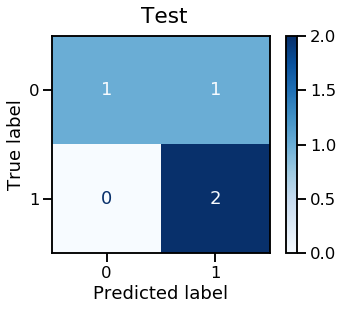

In [44]:
y_true = np.array([1, 0, 0, 1])
y_pred = np.array([1, 1, 0, 1])

plot_confusion_matrix(y_true, y_pred, labels=[0, 1], cmap=plt.cm.Blues, title="Test")

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns


def heatconmat(y_test, y_pred):
    sns.set_context('talk')
    plt.figure(figsize=(9, 6))
    sns.heatmap(confusion_matrix(y_test, y_pred),
                annot=True,
                fmt='d',
                cbar=False,
                cmap=plt.cm.Blues,
                yticklabels=sorted(np.unique(y_test)))
    plt.show()

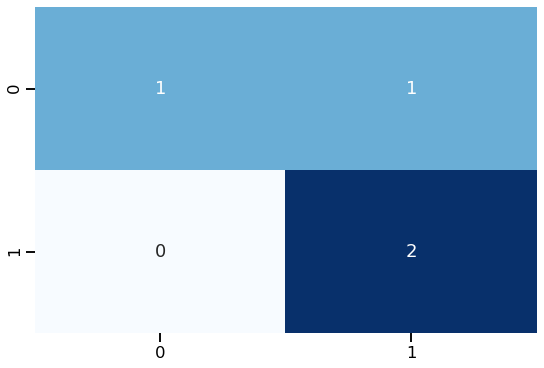

In [23]:
heatconmat(y_true, y_pred)